# **Agrupamento**

Clusterização é uma técnica de aprendizado não supervisionado que tem como objetivo agrupar objetos em grupos (clusters) de modo que os objetos dentro de um grupo sejam mais semelhantes entre si do que aos objetos em outros grupos. Os critérios de agrupamento podem ser baseados em proximidade, densidade, hierarquia e propabalidade.

- **Hard Clustering**: Cada ponto de dados pertence a exatamente um cluster. 
    - Exemplos: K-means, K-metroid, DBSCAN, Algoritmos hierárquicos
- **Soft Clustering**: Cada ponto de dados pode pertencer a mais de um cluster com diferentes graus de associação.
    - Exemplos: Fuzzy c-means, Gaussian Mixture Models (GMM)

1. **Particional**:

    - Divide os dados em k clusters não sobrepostos.
    - Exemplo: K-means.
    - Vantagens: Simplicidade e eficiência.
    - Desvantagens: Requer a especificação prévia do número de clusters.

2. **Hierárquica**:

    - Cria uma árvore de clusters (dendrograma) que pode ser cortada em diferentes níveis para obter diferentes números de clusters.
    - Exemplo: Hierarchical Clustering.
    - Vantagens: Não requer a especificação prévia do número de clusters.
    - Desvantagens: Alta complexidade computacional.

3. **Densidade**:

    - Forma clusters com base na densidade dos pontos de dados.
    - Exemplo: DBSCAN.
    - Vantagens: Capaz de identificar clusters de forma arbitrária e detectar ruídos.
    - Desvantagens: Sensível à escolha dos parâmetros de densidade.

4. **Model-Based**:

    - Assume que os dados são gerados por uma mistura de distribuições probabilísticas e tenta estimar essas distribuições.
    - Exemplo: Gaussian Mixture Models (GMM).
    - Vantagens: Flexibilidade para capturar a estrutura dos dados.
    - Desvantagens: Pode ser computacionalmente intensivo.

O objetivo principal de agrupar dados é identificar estruturas e padrões subjacentes, os quais podem fornecer insights valiosos e ajudar na tomada de decisões. Alguns objetivos específicos incluem:

- **Exploração de Dados:** Identificar padrões e tendências nos dados sem rótulos predefinidos.
- **Redução de Dimensionalidade:** Simplificar a complexidade dos dados, agrupando características semelhantes.
- **Segmentação de Mercado:** Agrupar clientes com base em comportamentos e características similares para elaborar estratégias de marketing direcionadas.
- **Análise de Anomalias:** Detectar comportamentos anômalos que não se encaixam em nenhum grupo.
- **Preprocessamento de Dados:** Utilizar o agrupamento como uma etapa preliminar para outras tarefas de aprendizado de máquina, como classificação e regressão.

## Hierárquica

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# # Gerando dados sintéticos (3 grupos distintos)
# np.random.seed(42)
# grupo1 = np.random.normal(loc=[0, 0], scale=0.5, size=(20, 2))
# grupo2 = np.random.normal(loc=[3, 3], scale=0.5, size=(20, 2))
# grupo3 = np.random.normal(loc=[0, 3], scale=0.5, size=(20, 2))
# dados = np.vstack((grupo1, grupo2, grupo3))

df = pd.read_csv(r"C:\Users\Pichau\OneDrive\Documentos\python\datasets\Nova pasta\agrupamento.csv")
df.head()

x0         x1        x2        x3        x4        x5        x6  \
0  1.595552  -4.346674  8.006582 -4.262376  0.385801  4.644062  5.375226   
1 -6.489084   7.012277 -4.749651  4.594856 -0.166381  2.857733 -9.623445   
2  1.894247  -6.744838  2.825614 -7.331948  0.997029  5.920935  7.417770   
3  6.415573 -14.342761  3.025061 -7.628352  2.671143  4.845565  6.840920   
4 -4.484811  -1.643745  3.553013  4.078241 -4.403737  1.310735  2.185299   

         x7         x8        x9  
0  5.277214  -3.128601  2.645725  
1 -1.466119 -10.169456  9.144532  
2  4.528579  -1.842886 -1.656199  
3  2.605155  -3.410962  2.590488  
4 -5.333726   0.946464 -6.721340

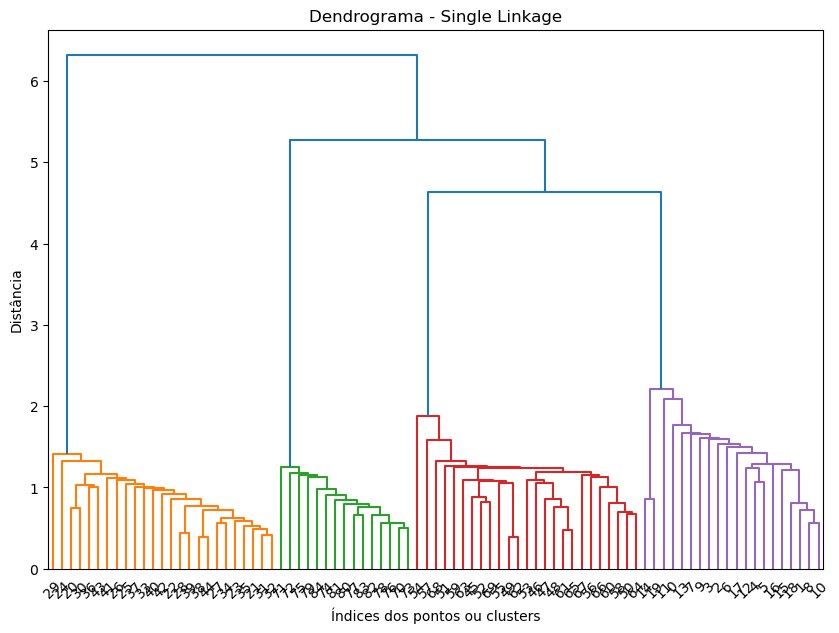

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:

# Computando o linkage usando Single Linkage
Z = linkage(df, method='single')

# Exibindo o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z,  
           leaf_rotation=45.,    # Rotação dos rótulos das folhas
           leaf_font_size=10.,   # Tamanho dos rótulos
           )
plt.title('Dendrograma - Single Linkage')
plt.xlabel('Índices dos pontos ou clusters')
plt.ylabel('Distância')
plt.show()

# Definindo um corte para formar os clusters.
# Por exemplo, usamos um limiar de distância t.
t = 1.0
clusters = fcluster(Z, t=t, criterion='distance')
# Definindo a partição para exatamente 4 clusters
clusters2 = fcluster(Z, 4, criterion='maxclust')
print(clusters2)

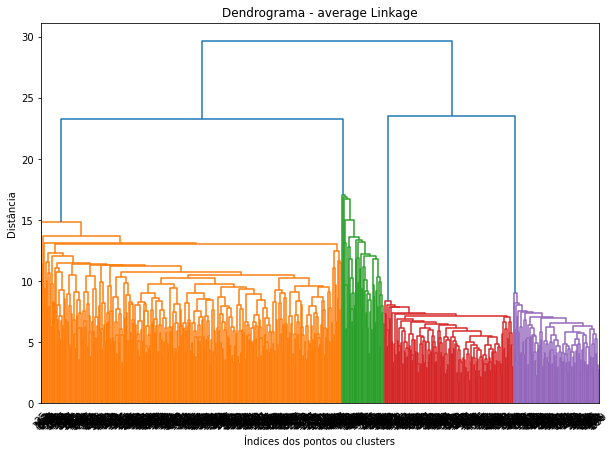

[1 3 1 1 4 2 3 2 2 1 1 1 3 1 3 3 3 3 3 1 3 4 1 4 1 1 4 1 1 3 1 1 1 2 1 1 3
 1 1 1 3 1 3 1 1 4 1 1 3 2 1 1 4 1 1 1 1 3 1 1 3 1 3 1 4 1 3 1 3 1 1 4 1 2
 4 3 4 1 1 3 1 1 1 3 2 3 1 1 1 1 4 1 1 1 2 1 2 3 3 1 1 1 3 1 3 2 4 4 3 1 1
 1 1 1 2 1 1 1 1 1 3 4 2 1 3 3 1 3 2 3 3 1 1 1 3 3 3 4 4 3 1 1 1 4 3 3 1 4
 1 3 1 1 2 1 3 1 1 1 1 1 3 1 4 1 4 1 4 1 3 1 3 1 2 1 1 1 1 1 1 3 2 1 1 1 1
 1 1 1 1 1 4 3 3 1 3 1 1 4 1 1 4 1 1 1 1 1 1 3 4 2 1 1 1 1 1 1 1 1 2 1 4 3
 3 4 3 1 1 1 1 4 1 1 3 1 3 1 4 2 4 1 3 4 3 1 1 3 1 1 3 1 2 3 1 1 1 4 3 4 1
 1 1 1 1 1 1 3 1 2 1 1 1 1 3 1 4 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 4
 1 1 1 2 1 1 3 3 2 1 1 2 1 1 4 1 1 1 4 1 1 1 4 1 1 3 1 1 3 3 3 1 4 1 3 1 1
 1 3 1 2 1 3 1 1 1 4 1 1 2 1 2 3 1 1 1 3 3 3 3 1 1 3 1 4 4 1 1 4 3 1 3 1 3
 1 1 1 1 1 1 4 3 1 1 3 1 4 3 2 3 1 3 2 1 4 1 3 4 3 1 2 4 3 1 4 1 4 4 4 1 3
 1 2 1 4 1 1 1 3 1 1 3 4 1 1 1 1 2 1 1 4 1 1 1 1 4 1 1 1 1 1 3 1 1 4 1 1 4
 3 2 3 1 1 4 4 1 1 1 1 2 3 3 1 3 3 1 3 3 1 1 4 3 1 2 4 1 3 1 3 2 1 1 1 1 4
 1 2 3 3 1 2 1 2 1 1 3 1 

In [ ]:

# Computando o linkage usando Average Linkage
Z = linkage(df, method='average', metric='euclidean')

# Exibindo o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z,  
           leaf_rotation=45.,    # Rotação dos rótulos das folhas
           leaf_font_size=10.,   # Tamanho dos rótulos
           )
plt.title('Dendrograma - average Linkage')
plt.xlabel('Índices dos pontos ou clusters')
plt.ylabel('Distância')
plt.show()

# Definindo um corte para formar os clusters.
# Por exemplo, usamos um limiar de distância t.
t = 1.0
clusters = fcluster(Z, t=t, criterion='distance')
# Definindo a partição para exatamente 4 clusters
clusters2 = fcluster(Z, 4, criterion='maxclust')
print(clusters2)

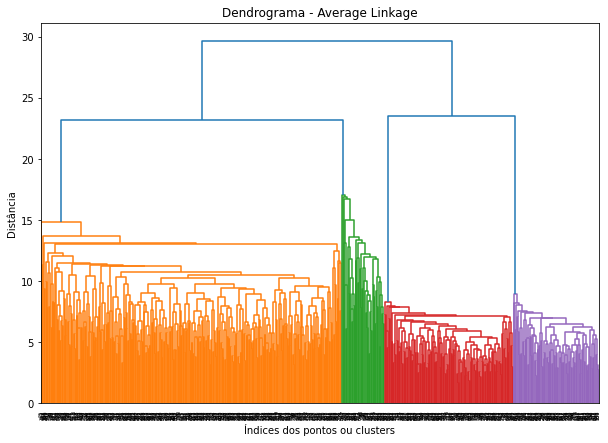

Melhor número de clusters: 4


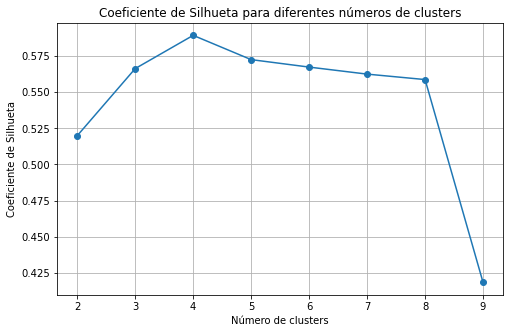

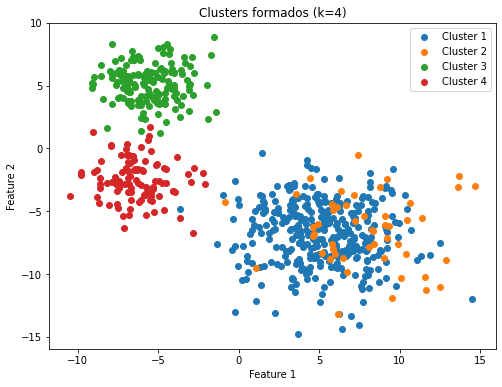

In [ ]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


# Exibir o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma - Average Linkage')
plt.xlabel('Índices dos pontos ou clusters')
plt.ylabel('Distância')
plt.show()

# Determinar o número de clusters com base no coeficiente de silhueta
silhouette_scores = []
range_n_clusters = range(2, 10)  # Testar de 2 a 9 clusters

for n_clusters in range_n_clusters:
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    score = silhouette_score(df, clusters)
    silhouette_scores.append(score)

# Encontrar o número de clusters com o maior coeficiente de silhueta
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Melhor número de clusters: {best_n_clusters}")

# Plotar os coeficientes de silhueta
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Coeficiente de Silhueta para diferentes números de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.grid()
plt.show()

# Formar os clusters com o melhor número de clusters
final_clusters = fcluster(Z, best_n_clusters, criterion='maxclust')

# Converter o DataFrame para um array NumPy
df_array = df.values

# Visualizar os clusters
plt.figure(figsize=(8, 6))
for cluster in np.unique(final_clusters):
    plt.scatter(df_array[final_clusters == cluster, 0], df_array[final_clusters == cluster, 1], label=f'Cluster {cluster}')
plt.title(f'Clusters formados (k={best_n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Kmeans

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.datasets._samples_generator import make_blobs

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np


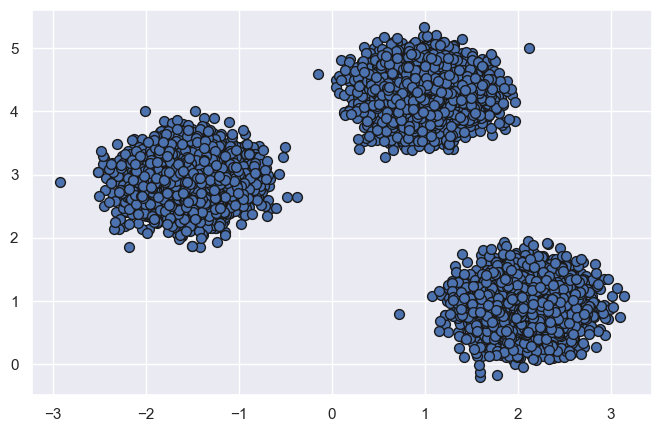

In [ ]:
X, _ = make_blobs(n_samples= 15000, centers = 3, cluster_std=0.3, random_state=0)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], s=50, marker='o', edgecolors='k')
plt.show()

In [ ]:
def visualize_kmeans(X,model):
    model.fit(X)
    y_kmeans = model.predict(X)

    plt.figure(figsize=(8,5))
    plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, edgecolors='k')
    centers = model.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c='blue', s=200, alpha=0.6 )


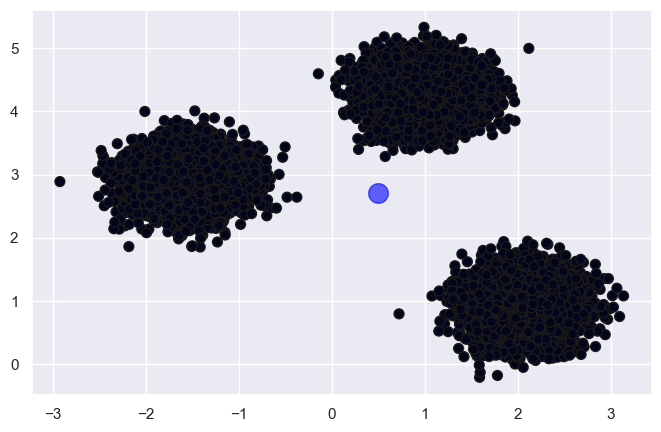

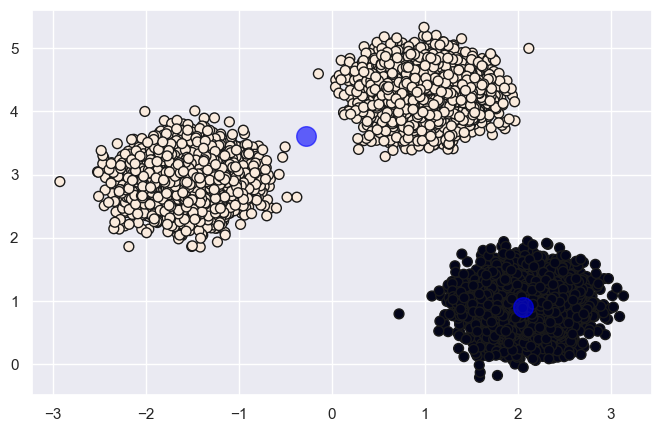

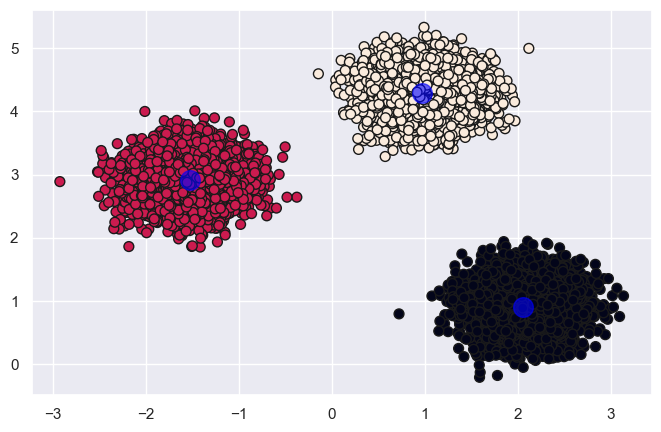

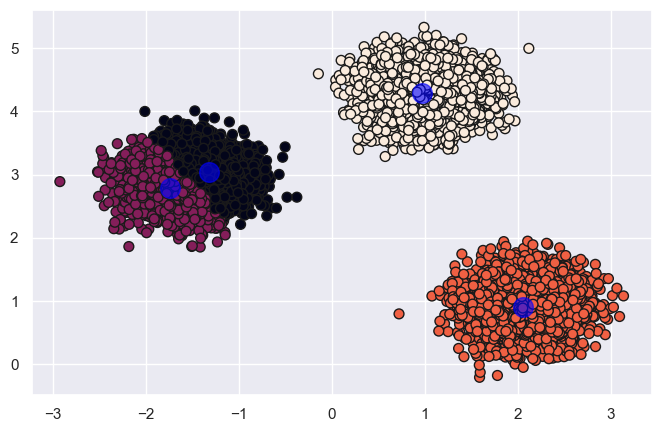

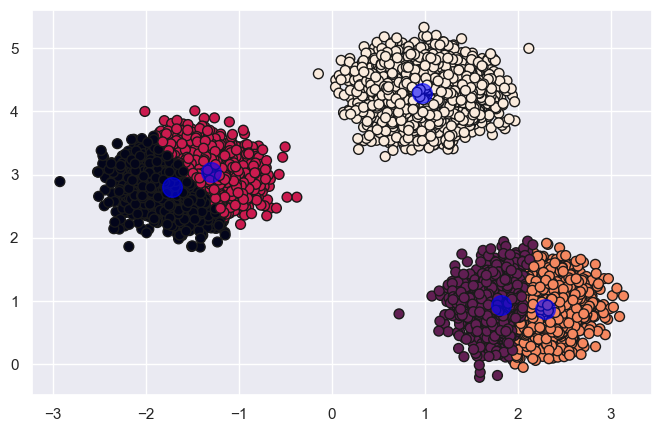

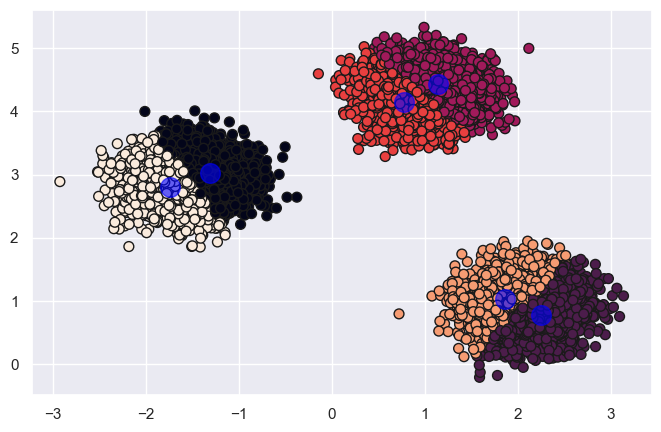

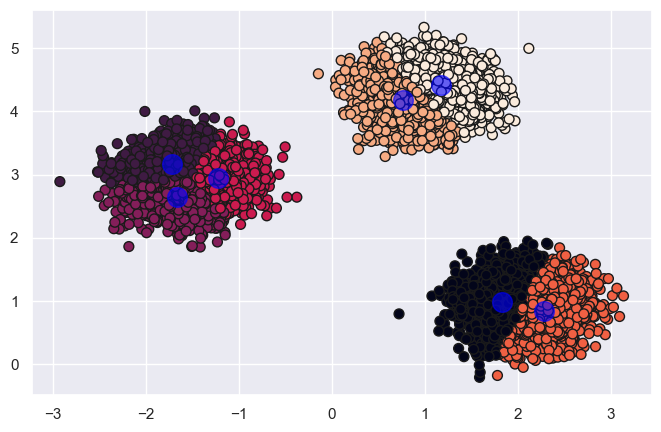

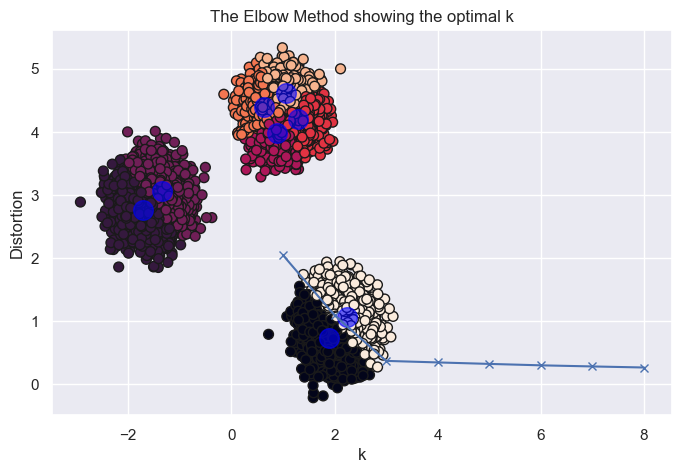

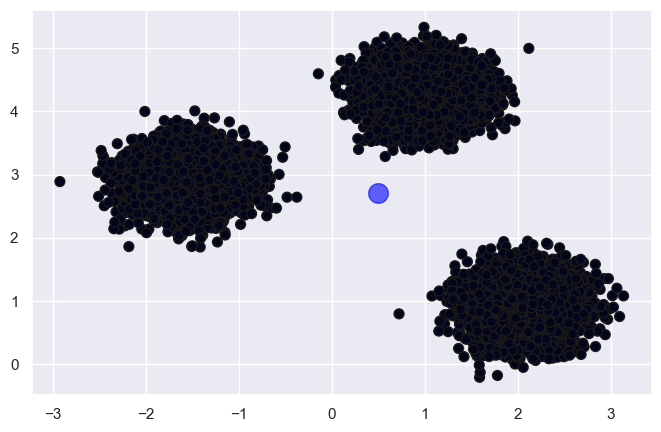

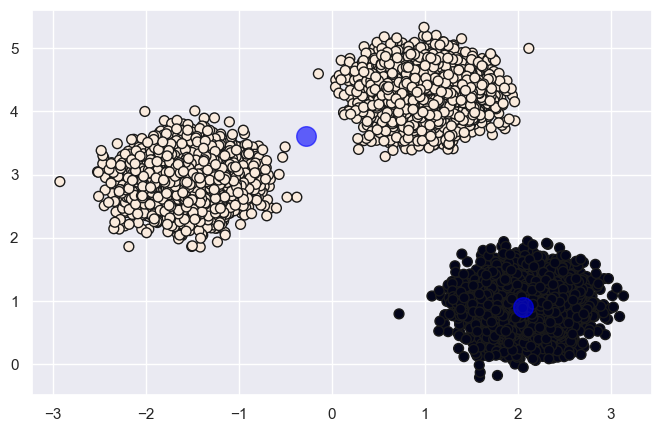

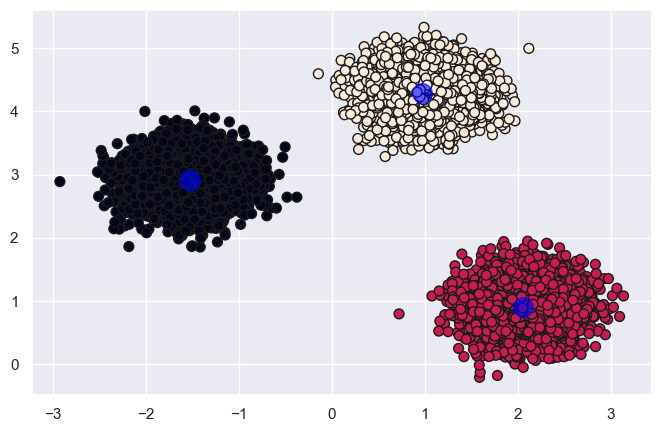

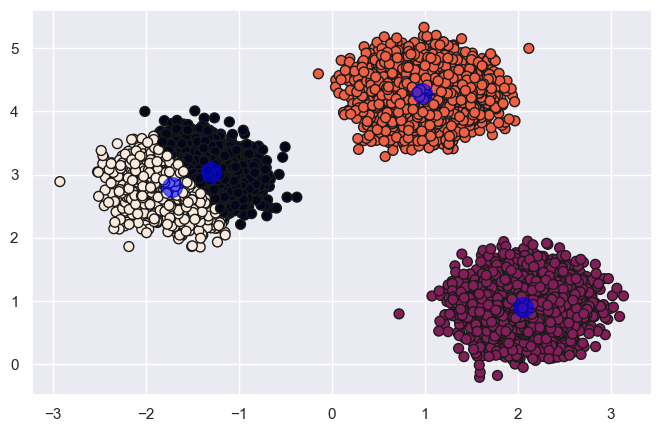

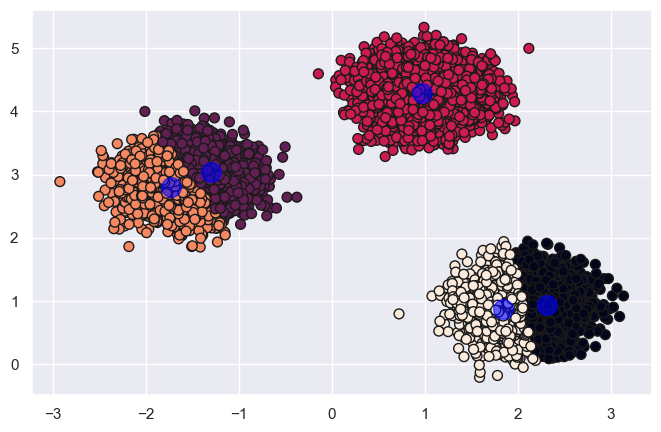

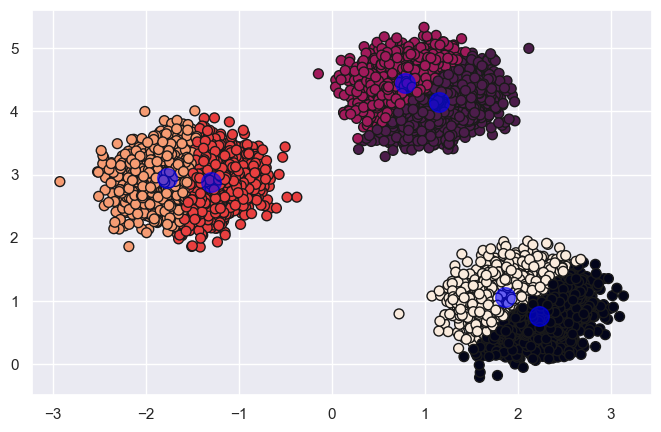

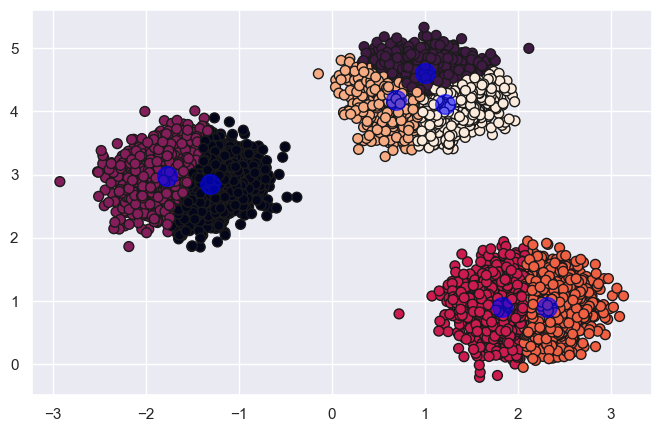

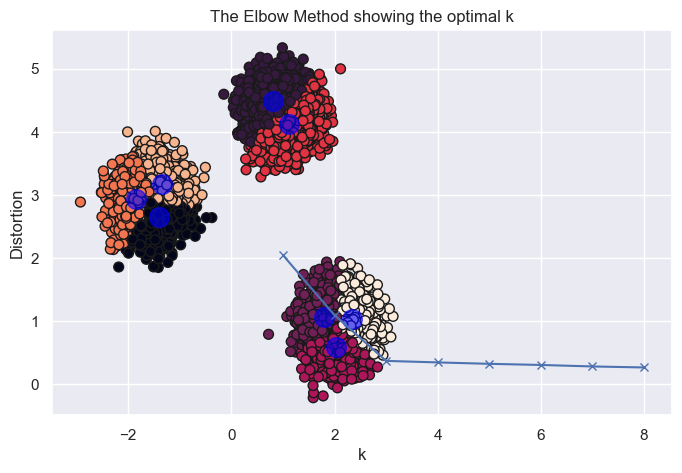

In [ ]:
K = []
distortions = []
for i in range(8):
    K.append(i+1)
    kmeans = KMeans(n_clusters=i+1, init='random')
    visualize_kmeans(X, kmeans)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

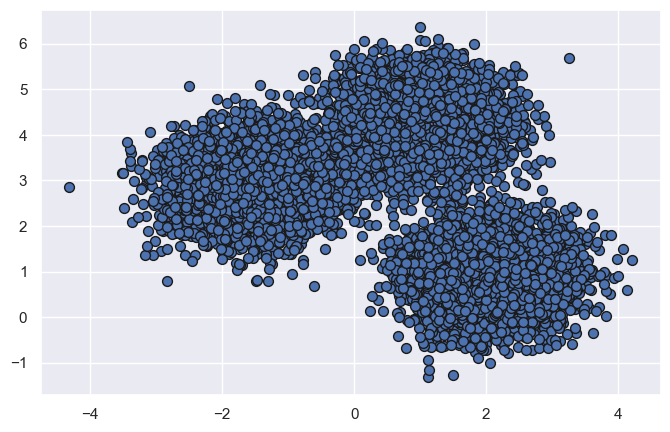

In [ ]:
X, _ = make_blobs(n_samples= 15000, centers = 3, cluster_std=0.6, random_state=0)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], s=50, marker='o', edgecolors='k')
plt.show()

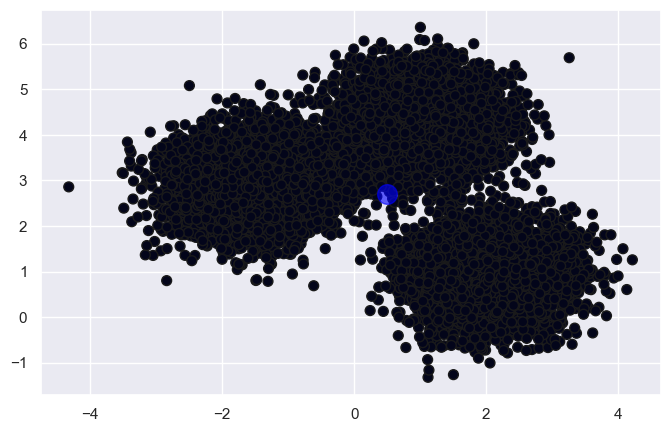

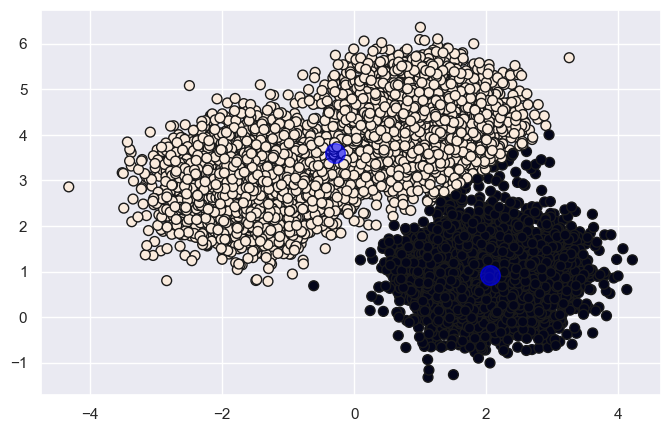

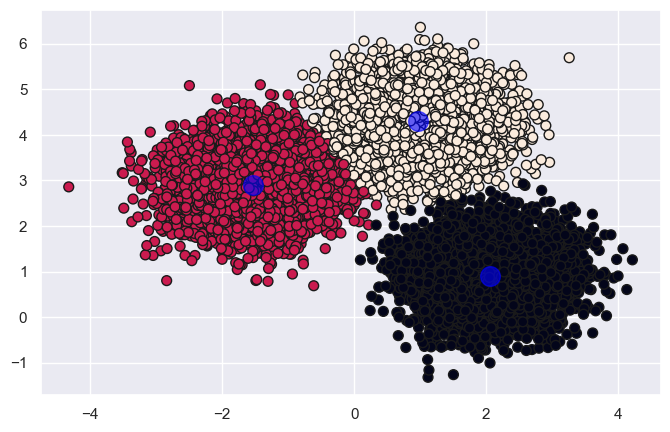

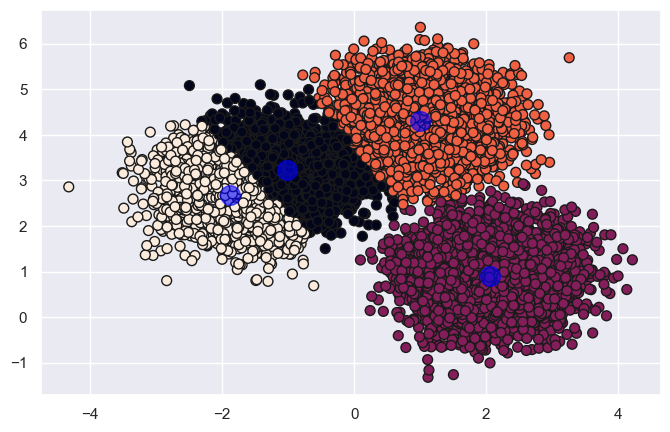

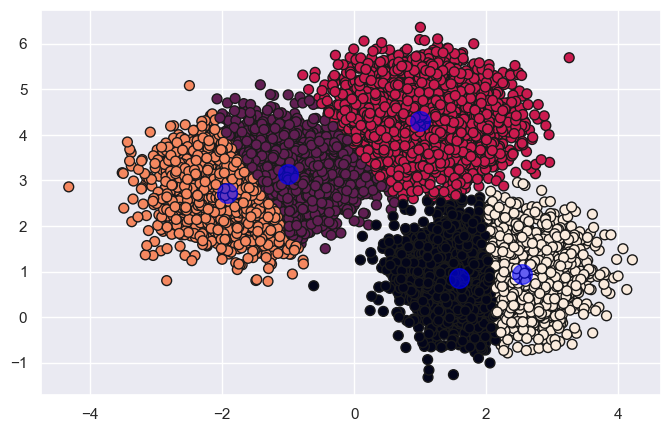

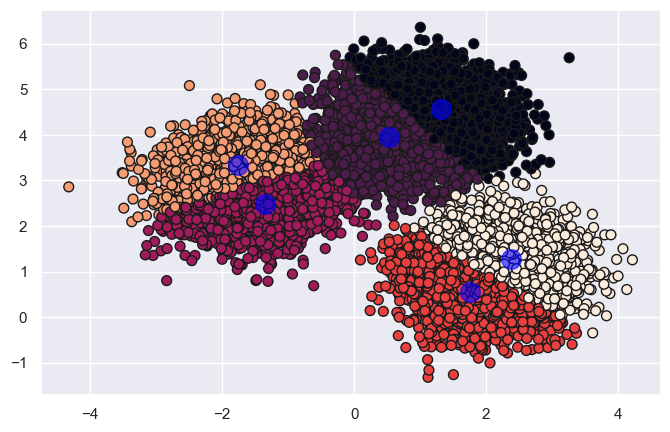

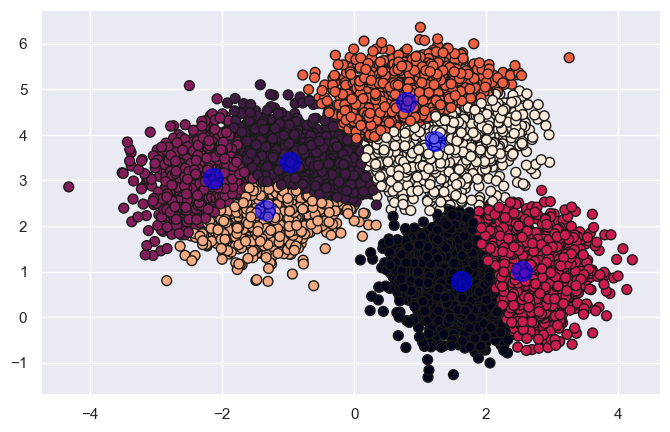

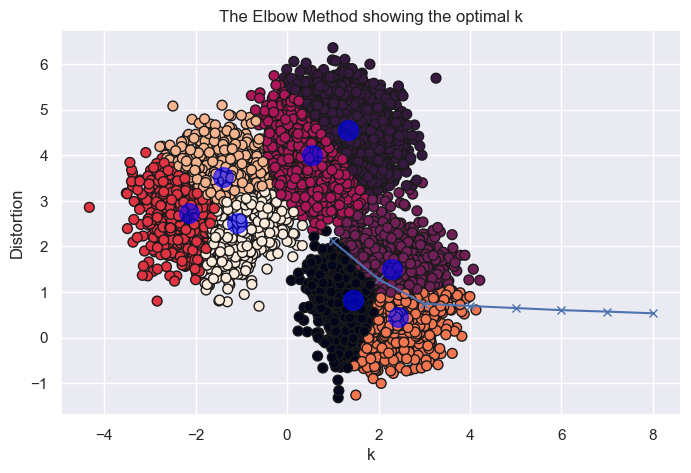

In [ ]:
K = []
distortions = []
for i in range(8):
    K.append(i+1)
    kmeans = KMeans(n_clusters=i+1, init='random')
    visualize_kmeans(X, kmeans)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

#plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

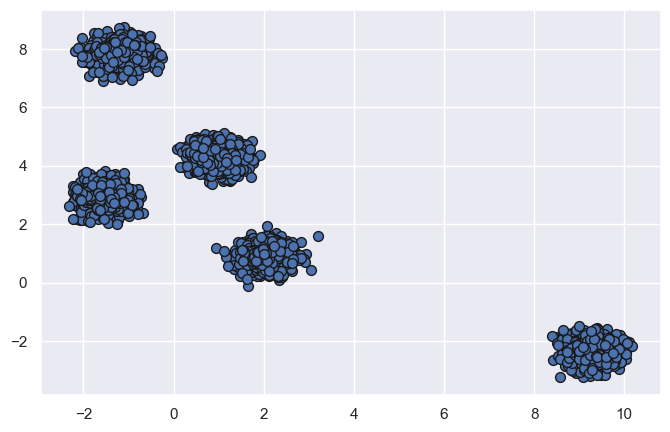

In [ ]:
# Silhueta
X, _ = make_blobs(n_samples= 5000, centers = 5, cluster_std=0.3, random_state=0)
plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], s=50, marker='o', edgecolors='k')
plt.show()

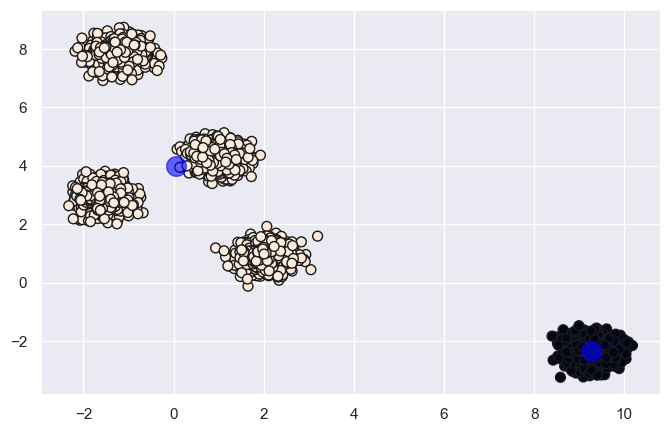

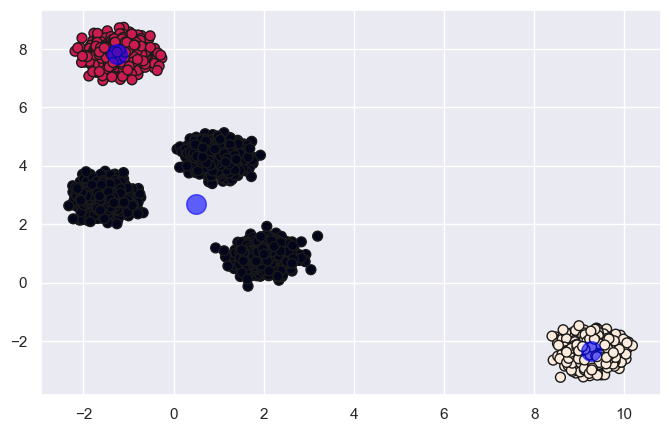

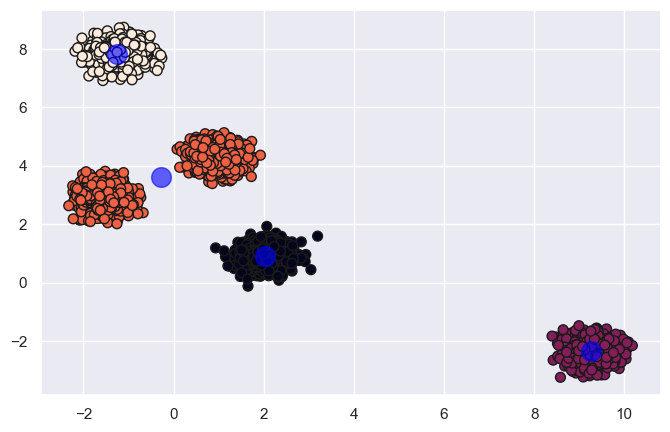

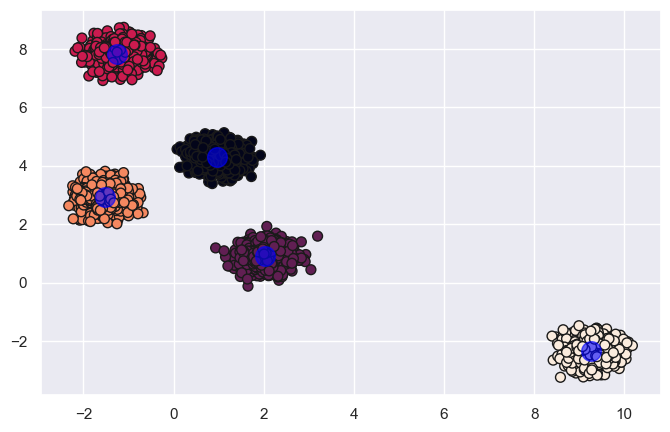

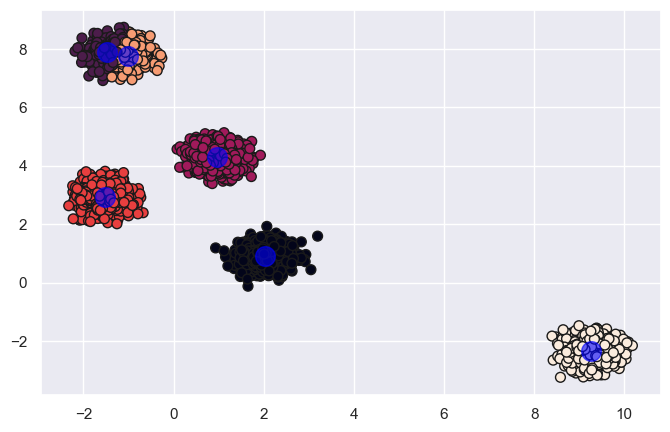

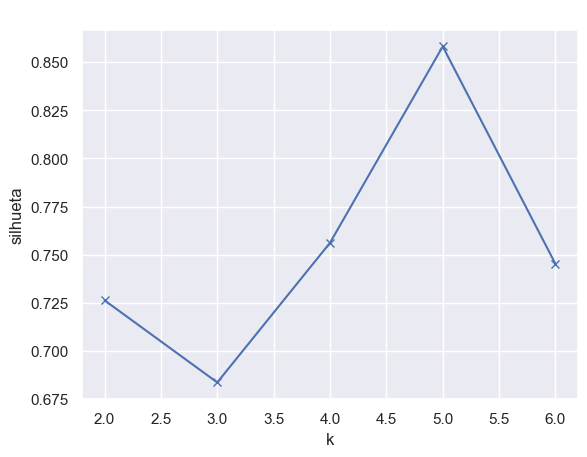

In [ ]:
K = []
silhueta = []
for i in range(1, 6):
    K.append(i+1)
    kmeans = KMeans(n_clusters=i+1, init='random')
    visualize_kmeans(X, kmeans)
    kmeans.fit(X)
    silhueta.append(metrics.silhouette_score(X, kmeans.labels_))
    plt.show()

#plot the elbow
plt.plot(K, silhueta, 'bx-')
plt.xlabel('k')
plt.ylabel('silhueta')
plt.title(' ')
plt.show()

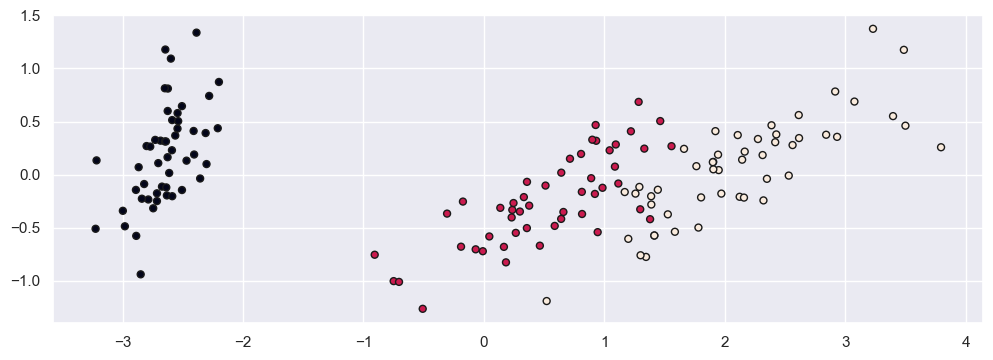

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import os
os.environ["OMP_NUM_THREADS"] = "1"

iris = load_iris()
X = iris.data
y = iris.target

X_reduced = PCA(2).fit_transform(iris.data)

plt.figure(figsize=(12,4))
plt.scatter(X_reduced[:,0], X_reduced[:,1], marker='o', c=y, s=25, edgecolors='k')
plt.show()

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


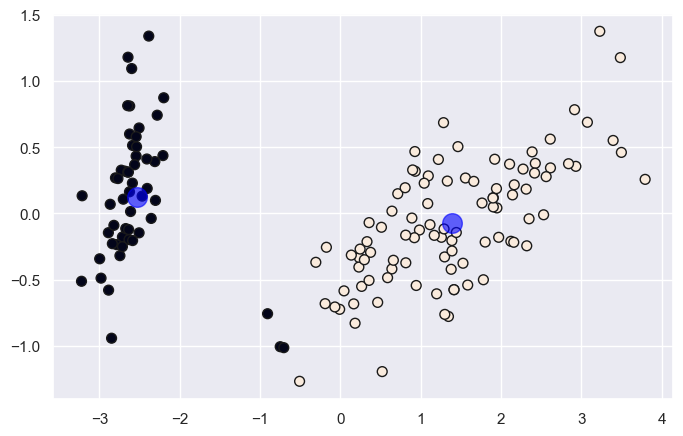

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


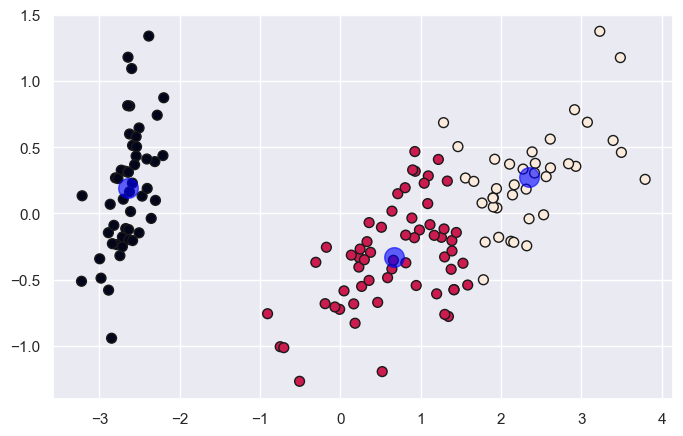

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


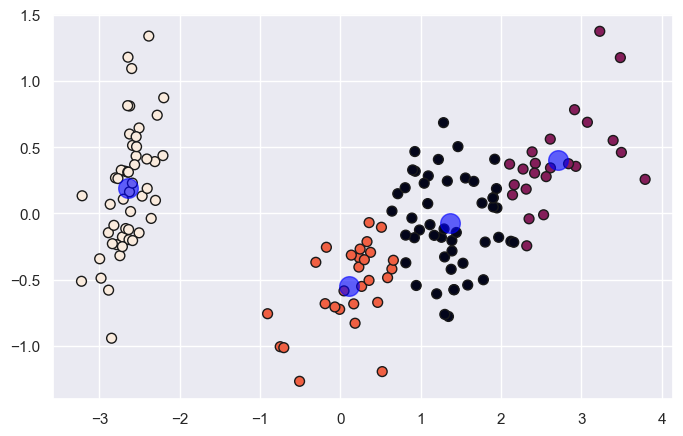

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


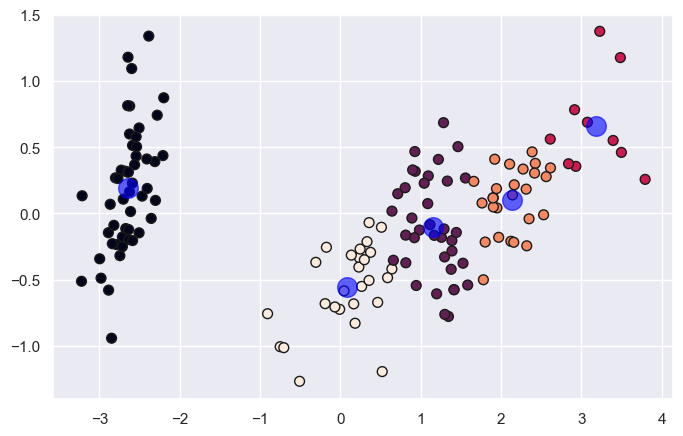

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


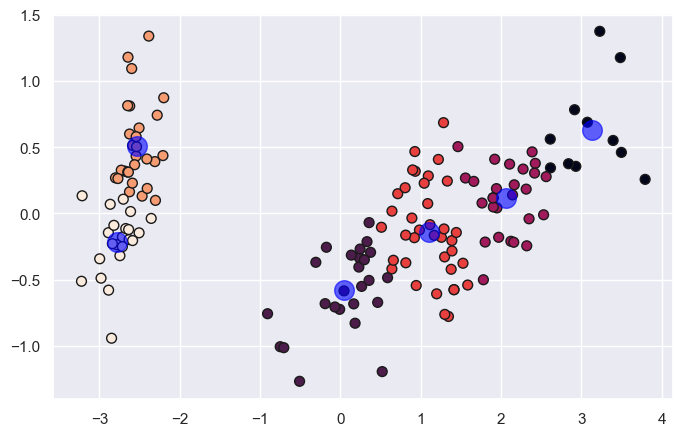

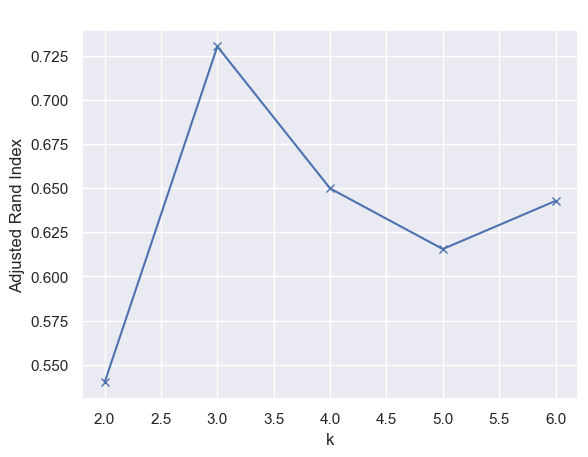

In [ ]:
os.environ["OMP_NUM_THREADS"] = "1"
K = []
rand_index = []
for i in range(1,6):
    K.append(i+1)
    kmeans = KMeans(n_clusters=i+1, init='random')
    visualize_kmeans(X_reduced, kmeans)
    kmeans.fit(X)
    rand_index.append(metrics.adjusted_rand_score(labels_true=y, labels_pred=kmeans.labels_))
    plt.show()


#plot the elbow
plt.plot(K, rand_index, 'bx-')
plt.xlabel('k')
plt.ylabel('Adjusted Rand Index')
plt.title('  ')
plt.show()

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


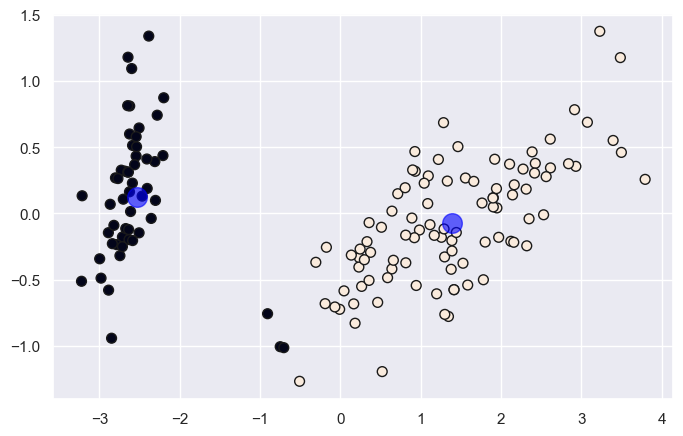

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


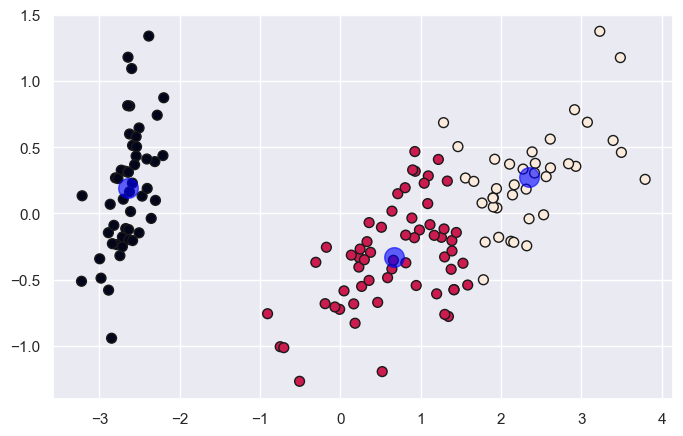

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


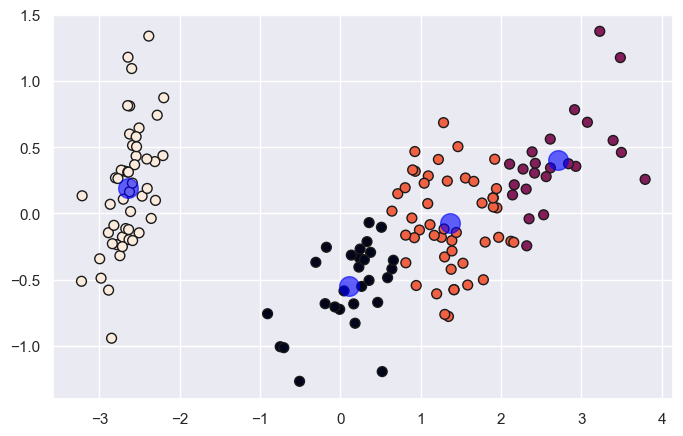

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


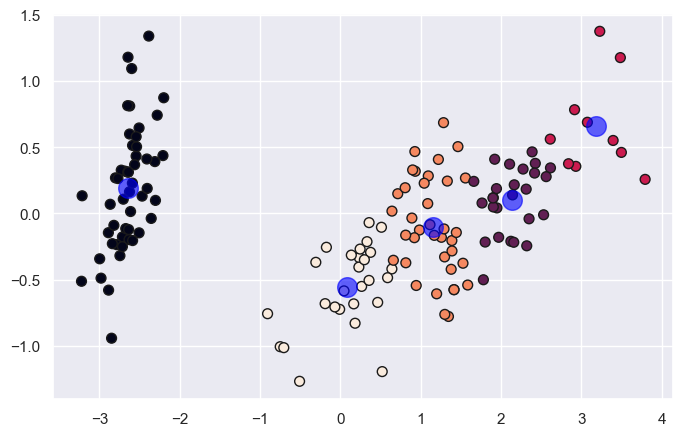

c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\vgflg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


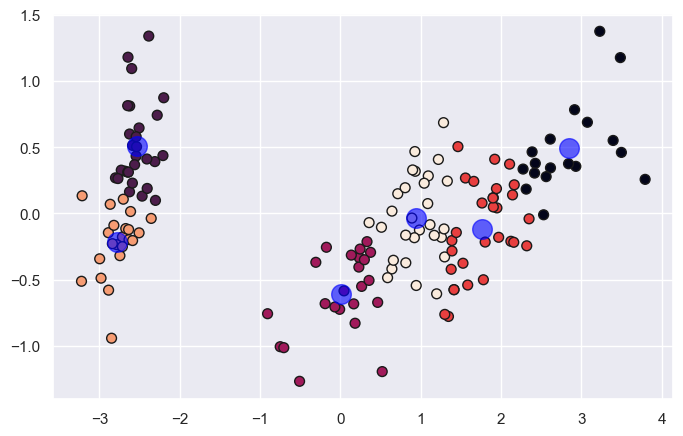

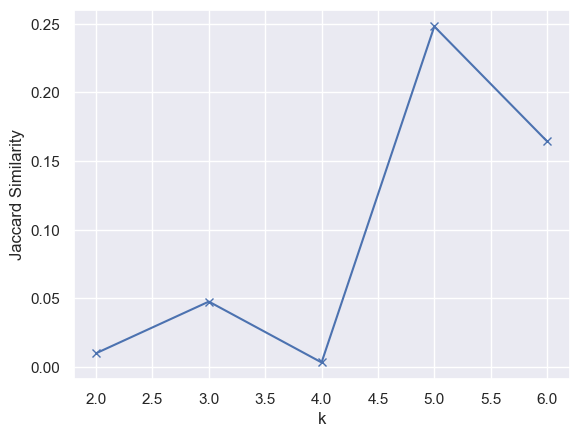

In [ ]:
K = []
jaccard_similarity = []
for i in range(1,6):
    K.append(i+1)
    kmeans = KMeans(n_clusters=i+1, init='random')
    visualize_kmeans(X_reduced, kmeans)
    kmeans.fit(X)
    jaccard_similarity.append(metrics.jaccard_score(y, kmeans.labels_, average='macro'))
    plt.show()

#plot the elbow
plt.plot(K, jaccard_similarity, 'bx-')
plt.xlabel('k')
plt.ylabel('Jaccard Similarity')
plt.title('')
plt.show()